In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('scope_37.csv',skiprows=1)

In [3]:
df
t = df.iloc[:,0] * 1e6 #us!
trans = df.iloc[:,1]
errsig = df.iloc[:,2]

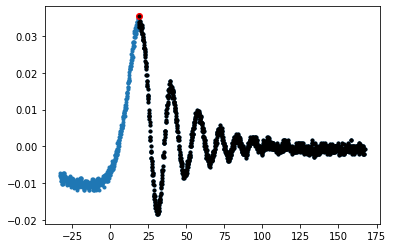

In [4]:
plt.plot(t,errsig,'.')
plt.plot(t[np.argmax(errsig)],np.max(errsig),'ro')
plt.plot(t[np.argmax(errsig):],errsig[np.argmax(errsig):],'k.')

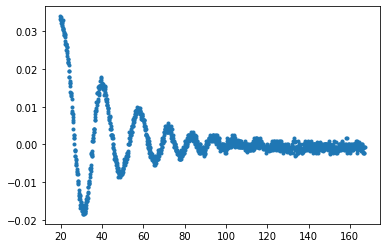

In [5]:
t_data = t[np.argmax(errsig)+10:]
errsig_data = errsig[np.argmax(errsig)+10:]
plt.plot(t_data,errsig_data,'.')

In [6]:
import matplotlib.pyplot as plt

print('Initialising plotting style...')

def set_plotting_style():
    plt.rc("font", family = 'Arial', size=10)
    plt.rc('axes', labelsize=20, titlesize = 20, labelpad=5)
    plt.rc('xtick', labelsize=18)
    plt.rc('ytick', labelsize=18)
    plt.rc('legend', fontsize=15)

print('Success! Plotting style initialised.')

set_plotting_style()

Initialising plotting style...
Success! Plotting style initialised.


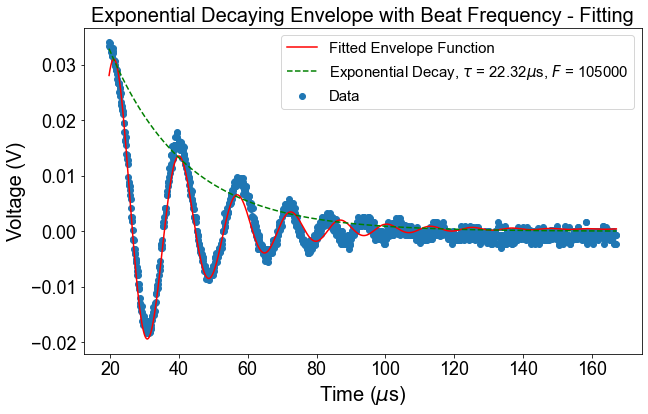


Fitted Parameters:
Fitted A   : 0.07940468859537494
Fitted tau: 22.317054899194563
Fitted f_beat: 0.04284925974878381
Fitted f_chirp: 0.00016723759470542806
Fitted B: 0.0004061158251534733
Finesse: 105000.0


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the exponential decaying envelope function with a beat frequency
def envelope_func(t, A, tau, f_beat, f_chirp, B):
    return A * np.exp(- t / tau) * np.cos(2 * np.pi * (f_beat + f_chirp*t) * t) + B

# Fit the data to the envelope function
initial_guess = [0.3, 17, 0.05, 0.0002, 0.1]  # Initial guess for [A, tau, f_beat]
popt, pcov = curve_fit(envelope_func, t_data, errsig_data, p0=initial_guess)

# Extract the fitted parameters
fit_A, fit_tau, fit_f_beat, fit_f_chirp, fit_B = popt
FSR = 1.5e9 # Free spectral range of the cavity in Hz
finesse =  np.round(2* np.pi * FSR * fit_tau * 1e-6, -3)/2

# Generate the fitted curve
y_fit = envelope_func(t_data, fit_A, fit_tau, fit_f_beat, fit_f_chirp, fit_B)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(t_data, errsig_data, label='Data')
plt.plot(t_data, y_fit, label='Fitted Envelope Function', linestyle='-', color='r')
plt.plot(t_data, fit_A * np.exp(- t_data / fit_tau), label=r'Exponential Decay, $\tau$ = %.2f$\mu$s, $F$ = %.0f'%(fit_tau,finesse), linestyle='--', color='g')
plt.xlabel(r'Time ($\mu$s)')
plt.ylabel('Voltage (V)')
plt.title('Exponential Decaying Envelope with Beat Frequency - Fitting')
plt.legend()
plt.show()

print("\nFitted Parameters:")
print("Fitted A   :", fit_A)
print("Fitted tau:", fit_tau)
print("Fitted f_beat:", fit_f_beat)
print("Fitted f_chirp:", fit_f_chirp)
print("Fitted B:", fit_B)
print("Finesse:", finesse)
